In [90]:
import os
import numpy as np
path="Mini_BAGLS_dataset"

folder= os.listdir(path)
imag_map = {}


#separating the files into images , metadata and segmented img and sorting them

for f in folder:
    if(f[-8:]=="_seg.png"):
        if int(f[:-8]) not in imag_map:
            imag_map[int(f[:-8])] ={}
    
        imag_map[int(f[:-8])]["seg_img"] = f

    elif(f[-5:]==".meta"):
        if int(f[:-5]) not in imag_map:
            imag_map[int(f[:-5])] ={}

        imag_map[int(f[:-5])]["meta"] = f

    else:
        if int(f[:-4]) not in imag_map:
            imag_map[int(f[:-4])] ={}

        imag_map[int(f[:-4])]["img"] = f

# four random images and there data
import random

rand_nums = []

for i in range(4):
    rand_nums.append(random.randint(0,99))

print(rand_nums)

#printing the random imgs and data;
for i in rand_nums:
    print(imag_map[i])

[67, 29, 75, 70]
{'seg_img': '67_seg.png', 'img': '67.png', 'meta': '67.meta'}
{'meta': '29.meta', 'seg_img': '29_seg.png', 'img': '29.png'}
{'meta': '75.meta', 'img': '75.png', 'seg_img': '75_seg.png'}
{'seg_img': '70_seg.png', 'meta': '70.meta', 'img': '70.png'}


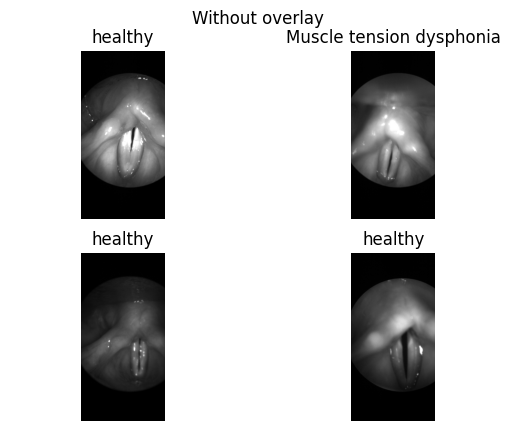

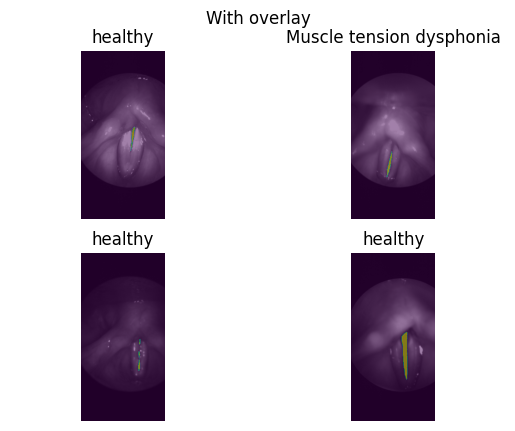

In [117]:
#Task 2
from pathlib import Path
import matplotlib.pyplot as plt
import cv2 
import imageio as io
import skimage

folder_path = Path(path)

img_paths=[]
for i in rand_nums:
    img_paths.append([imag_map[i]["img"],imag_map[i]["seg_img"],imag_map[i]["meta"]])

# print(img_paths)

import json

# with open(folder_path/"99.meta","r") as f:
#     data =json.load(f)

# print(data)

#ploting without overlay

plt.figure()
plt.title("Without overlay", pad=20)
plt.axis("off")
for i in range(1,5):
    with open(folder_path/img_paths[i-1][2],"r") as f:
        metadata =json.load(f)
    plt.subplot(2,2,i)
    plt.title(metadata["Subject disorder status"])
    temp_img_path = folder_path/img_paths[i-1][0]
    temp_seg_img_path = folder_path/img_paths[i-1][1]
    temp_img = skimage.io.imread(temp_img_path)
    temp_seg_img = skimage.io.imread(temp_seg_img_path)
    plt.imshow(temp_img)
    #plt.imshow(temp_seg_img,alpha=0.5)
    plt.axis("off")

plt.show()

#plotting with overlay

plt.title("With overlay",pad=20)
plt.axis("off")
for i in range(1,5):
    with open(folder_path/img_paths[i-1][2],"r") as f:
        metadata =json.load(f)
    plt.subplot(2,2,i)
    plt.title(metadata["Subject disorder status"])
    temp_img_path = folder_path/img_paths[i-1][0]
    temp_seg_img_path = folder_path/img_paths[i-1][1]
    temp_img = skimage.io.imread(temp_img_path)
    temp_seg_img = skimage.io.imread(temp_seg_img_path)
    plt.imshow(temp_img)
    plt.imshow(temp_seg_img,alpha=0.5)
    plt.axis("off")
plt.show()



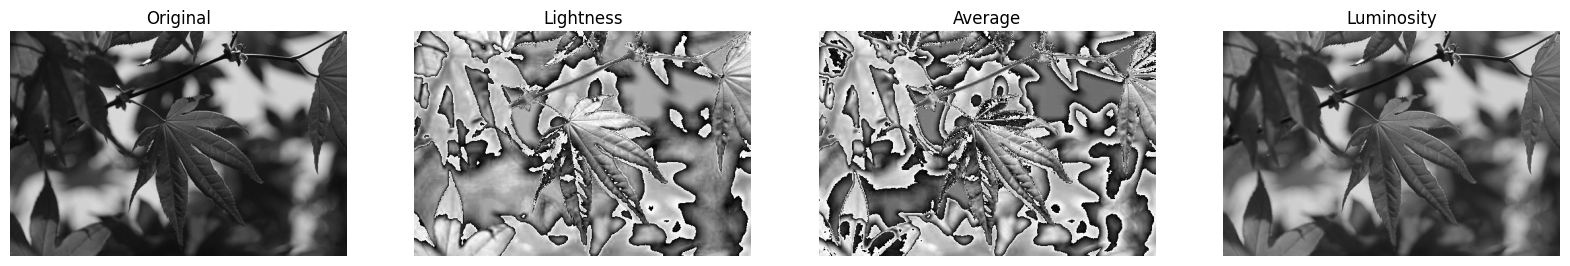

In [ ]:
#task 3
leaves_path = Path("leaves.jpg")
leaves_img = skimage.io.imread(leaves_path)

# print("R",leaves_img[:,:,0])
# print("G",leaves_img[:,:,1])
# print("b",leaves_img[:,:,2])
# print("\n",leaves_img)

R , G ,B = leaves_img[:,:,0],leaves_img[:,:,1],leaves_img[:,:,2]


plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(leaves_img)
plt.axis("off")


plt.subplot(1,4,2)
plt.title("Lightness")
lightnesss = (np.minimum(R,G,B)+np.maximum(R,G,B))/2
plt.imshow(lightnesss,cmap="gray")
plt.axis("off")


plt.subplot(1,4,3)
plt.title("Average")
average = (R+G+B)/3
plt.imshow(average,cmap="gray")
plt.axis("off")


plt.subplot(1,4,4)
plt.title("Luminosity")
luminosity = 0.2989*R + 0.5870*G + 0.1140*B
plt.imshow(luminosity,cmap="gray")
plt.axis("off")
plt.show()